In [158]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [159]:
df = pd.read_csv('final_train.csv')
df = df.drop('Unnamed: 0', axis = 1) # remove extra column

In [160]:
TEST = pd.read_csv('final_test.csv')
TEST = TEST.drop('Unnamed: 0', axis = 1) # remove extra column

## Lasso

In [161]:
target = df['SalePrice']
feats = df.drop('SalePrice', axis=1)

In [162]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
lasso.set_params(normalize=True, max_iter = 10000)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [163]:
grid_params = [{"alpha":np.linspace(0.000001, .001,100)}]

In [164]:
grid = GridSearchCV(estimator = lasso, param_grid = grid_params, cv = 10, return_train_score=True)

lassogrid = grid.fit(feats,target)

In [165]:
grid_report = pd.DataFrame(lassogrid.cv_results_)
grid_report[['param_alpha','mean_test_score','mean_train_score','rank_test_score']].head(10)

,param_alpha,mean_test_score,mean_train_score,rank_test_score
0,1e-06,0.900128,0.941990,35
1,1.10909e-05,0.907939,0.939853,21
2,2.11818e-05,0.910074,0.938228,15
3,3.12727e-05,0.911735,0.936671,11
4,4.13636e-05,0.912801,0.935448,8
5,5.14545e-05,0.913624,0.934237,5
6,6.15455e-05,0.914214,0.933009,3
7,7.16364e-05,0.914451,0.931740,1
8,8.17273e-05,0.914371,0.930474,2
9,9.18182e-05,0.914053,0.929225,4


In [166]:
print(lassogrid.best_score_)
print(lassogrid.best_params_)
lasso_best = lassogrid.best_estimator_

0.9144511165676683
{'alpha': 7.163636363636365e-05}


In [167]:
lasso_best.fit(feats,target)
lasso_best.score(feats,target)

0.9301422441617709

In [211]:
lasso_best.alpha

7.163636363636365e-05

In [168]:
'''Calculate Root Mean Square Error'''
pred_vals = pd.Series(lasso_best.predict(feats))
resid = (target-pred_vals)**2
root_mse = np.mean((target-pred_vals)**2)**0.5

In [169]:
print(f'RMSE for train: {root_mse}')

RMSE for train: 0.10464970798062692


### try it on the test data!

In [170]:
TEST.columns.to_list()

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscVal',
 'YrSold',
 'Total.Porch',
 'Total.HalfBath',
 'Total.FullBath',
 'Total.RmsAbvGrd',
 'OverallScore',
 'ExterScore',
 'BsmtScore',
 'TotalFlSF',
 'KitchenScore',
 'GarageScore',
 'MSSubClass_SC150',
 'MSSubClass_SC160',
 'MSSubClass_SC180',
 'MSSubClass_

In [171]:
predicted_price = pd.Series(np.exp(lasso_best.predict(TEST)))
predicted_price

0       119511.472427
1       159657.901006
2       182891.326600
3       196250.905002
4       201575.423838
            ...      
1454     87004.241589
1455     78570.515371
1456    164486.322178
1457    120173.179957
1458    224189.334371
Length: 1459, dtype: float64

In [174]:
Id_test = pd.read_csv('test.csv')['Id']
submission = pd.DataFrame({'Id': Id_test, 'SalePrice': predicted_price})

In [176]:
submission.to_csv('submission.csv', index=False)

In [203]:
trainscores = pd.Series(grid_report['mean_train_score'])
testscores = pd.Series(grid_report['mean_test_score'])

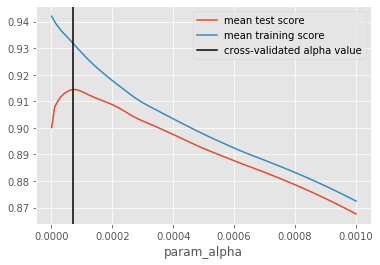

In [216]:
testscores.plot(label='mean test score')
trainscores.plot(label='mean training score')
plt.axvline(lasso_best.alpha, 0, 1, label='cross-validated alpha value',c='black')
plt.legend(loc=1)